### Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

#### Data preparation and visualization 
- **Data Reading/Data Understanding** → Defining the path for train and test images. 
- **Dataset Creation** → Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
- **Dataset visualisation** → Create a code to visualize one instance of all the nine classes present in the dataset. 

#### Model Building & training : 
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training.
- Train the model for ~20 epochs.
- Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.
- Chose an appropriate data augmentation strategy to resolve underfitting/overfitting. 

#### Model Building & training on the augmented data :
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training.
- Train the model for ~20 epochs.
- Write your findings after the model fit, see if the earlier issue is resolved or not?

#### Class distribution: Examine the current class distribution in the training dataset 
- Which class has the least number of samples?
- Which classes dominate the data in terms of the proportionate number of samples?

#### Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.
- Model Building & training on the rectified class imbalance data:
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training
- Train the model for ~30 epochs
- Write your findings after the model fit, see if the issues are resolved or not?
 

### Import the required libraries

In [93]:
# Import the required libraries

import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as re
import time
from glob import glob
import numpy as np

# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

import Augmentor


**Data Reading/Data Understanding**

In [2]:
# Train & Test Image directory. 
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [3]:
# Count the number of image in Train and Test directory. Use 'glob' to get all the image filepath.
train_files_path = data_dir_train.glob('*/*.jpg')
test_files_path= data_dir_test.glob('*/*.jpg')

# Image count
print(f'Train Image Count: {len(list(train_files_path))}')
print(f'Test Image Count: {len(list(test_files_path))}')


Train Image Count: 2239
Test Image Count: 118


**Dataset Creation**

In [5]:
# Define the constants that will be used in the Models with the recommended values in problem statement.

BATCH_SIZE = 32 
IMG_HEIGHT = 180
IMG_WIDTH = 180

#### Create training and validation dataset with 80:20 Split 

In [6]:
# Training Dataset
train_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            validation_split=0.2,
                                                            subset="training",
                                                            label_mode='categorical',
                                                            seed=123                                                            
                                                            )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# Validation Dataset
val_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                         batch_size=BATCH_SIZE,
                                                         image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         validation_split=0.2, 
                                                         subset="validation",
                                                         label_mode='categorical',
                                                         seed=123)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# Get the Class Names from the Training Set
class_names = train_ds.class_names

print(f'Class Name: {class_names}')

Class Name: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Dataset visualisation**

In [9]:
# Display one instance of the image from each Class 

# Create a dictionary to store one file path from each class
random_img_from_class = {}

for class_name in class_names: 
    # Get all files in the current class directory
    files = os.listdir(f"{data_dir_train}/{class_name}")
    
    # Pick a random file from the list
    random_file = files[re.randint(0, len(files) - 1)]
    
    # Store the full path of the random file in the dictionary
    random_img_from_class[class_name] = f"{data_dir_train}/{class_name}/{random_file}"


random_img_from_class

{'actinic keratosis': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/actinic keratosis/ISIC_0028517.jpg',
 'basal cell carcinoma': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/basal cell carcinoma/ISIC_0027473.jpg',
 'dermatofibroma': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/dermatofibroma/ISIC_0029177.jpg',
 'melanoma': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/melanoma/ISIC_0000285.jpg',
 'nevus': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/nevus/ISIC_0000223.jpg',
 'pigmented benign keratosis': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/pigmented benign keratosis/ISIC_0028449.jpg',
 'seborrheic keratosis': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/seborrheic keratosis/ISIC_0011077.jpg',
 'squamous cell carcinoma': 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train/squamous cell car

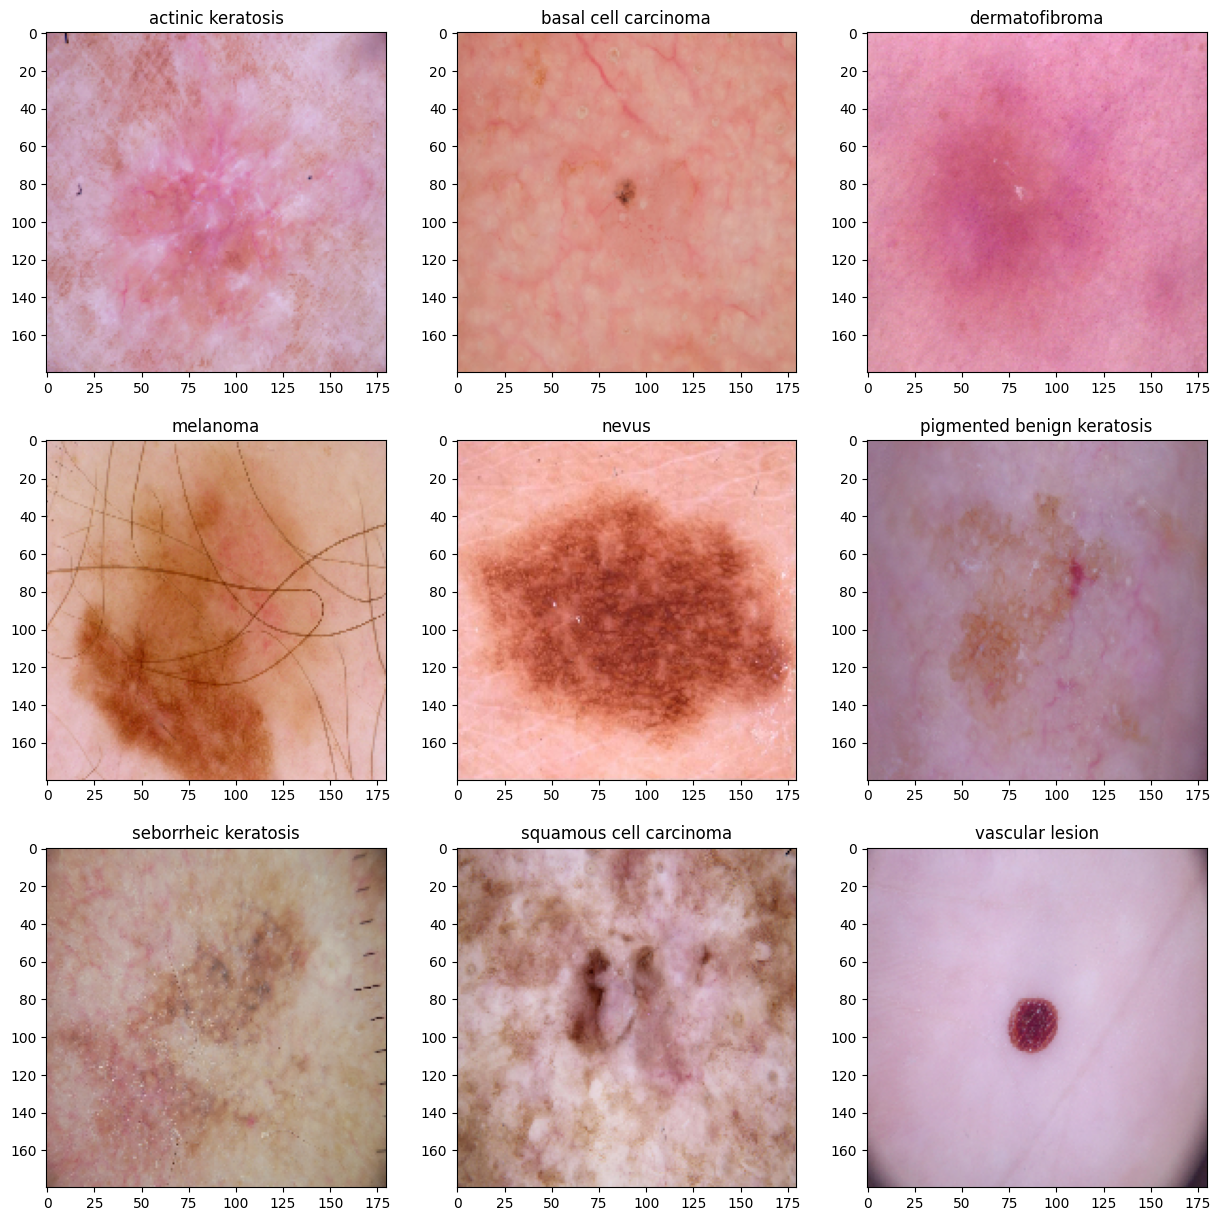

In [10]:

# Visualize image 
plt.figure(figsize=(15,15))
index = 0
for class_name in class_names:
    class_image_path = random_img_from_class[class_name]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(class_image_path ,target_size=(IMG_HEIGHT, IMG_WIDTH)))
    plt.title(class_name)

### Model Building & Training on existing dataset

- `Dataset.cache()` stores the images in memory after they are loaded from disk during the first epoch, improving performance in subsequent epochs by eliminating the need to reload the data.

- `Dataset.prefetch()` allows overlapping of data preprocessing with model execution during training. This ensures that data is prepared and ready for the next training step while the model is executing, enhancing overall training efficiency.


In [26]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
# The input image share would be the height x Width x Color Channel(RGB) - 180 x 180 x 3.
input_image_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

In [28]:
model = Sequential() 

# First Convolutional Layer
model.add(layers.Rescaling(1./255, input_shape=input_image_shape))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Flatten function flattens the multi-dimensional input tensors into a single dimension
model.add(layers.Flatten())   

# Dense Layer
model.add(layers.Dense(512, activation='relu'))

# Dense Layer
model.add(layers.Dense(128, activation='relu'))

# Dense Layer with softmax activation function to scale numbers/logits into probabilities
model.add(layers.Dense(len(class_names), activation='softmax'))

d:\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:

# Adam Optimization: A stochastic gradient descent algorithm that adapts learning rates for each parameter 
# based on estimates of first-order (mean) and second-order (variance) moments.

# Categorical Crossentropy: A loss function used for multi-class classification models, 
# particularly when the output labels belong to two or more distinct classes.

model.compile(  
                optimizer=Adam(learning_rate=0.001), 
                loss='categorical_crossentropy', 
                metrics=['accuracy']
                )


In [30]:
# Model summary representation
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,374,985 (100.61 MB)

 Trainable params: 26,374,985 (100.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
epochs = 20 # Epochs set to 20 as suggested in the Case Study for initial model training
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # If needed to stop the training earlier.

In [32]:
# Returns epoch if training was stopped due to EarlyStopping
def check_early_stop_epoch():
    if early_stop.stopped_epoch > 0:
        return early_stop.stopped_epoch
    else:
        return 0

In [33]:
# Model Training

history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=epochs)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 457ms/step - accuracy: 0.2493 - loss: 2.1993 - val_accuracy: 0.3803 - val_loss: 1.6923
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 472ms/step - accuracy: 0.3884 - loss: 1.7094 - val_accuracy: 0.4564 - val_loss: 1.5485
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 473ms/step - accuracy: 0.4535 - loss: 1.4942 - val_accuracy: 0.5056 - val_loss: 1.4314
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 464ms/step - accuracy: 0.4940 - loss: 1.4165 - val_accuracy: 0.5145 - val_loss: 1.4352
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 496ms/step - accuracy: 0.5322 - loss: 1.3037 - val_accuracy: 0.5168 - val_loss: 1.3449
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 511ms/step - accuracy: 0.5600 - loss: 1.2230 - val_accuracy: 0.4743 - val_loss: 1.4771
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 516ms/step - accuracy: 0.5560 - loss: 1.2367 - val_accuracy: 0.5324 - val_loss: 1.3586
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 531ms/step - accuracy: 0.5755 - loss: 1.2230 - val_accu

### Visualizing training results

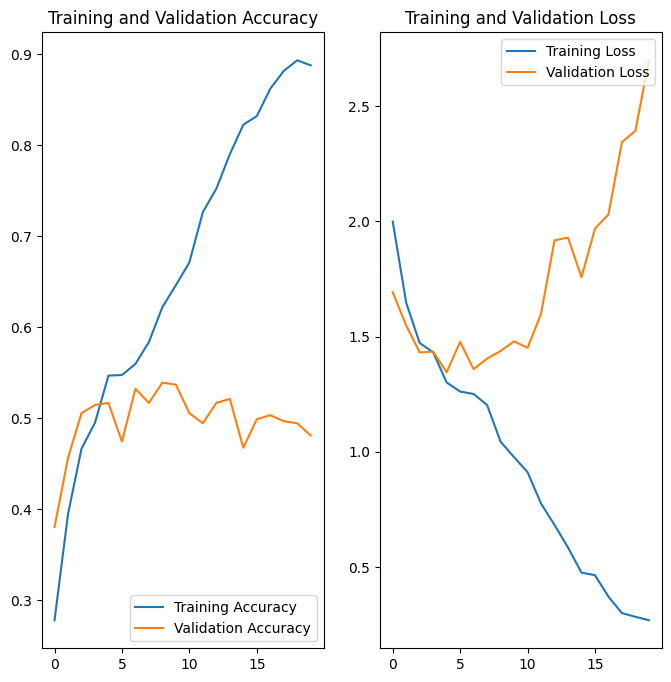

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model Evaluation
- **Training Progress**: The model shows consistent improvement in training accuracy, rising from 27.8% to 88.8%, with training loss decreasing steadily.
- **Validation Performance**: Validation accuracy stabilizes around 52-53%, and validation loss fluctuates, indicating potential overfitting.
- **Overfitting Concern**: Despite strong performance on training data, the model struggles to generalize to unseen data showing lack of generalization.


### Model Building & training on the augmented data

#### Data Augmentation Strategy:
- **Rescaling**: Normalize input pixel values from the range [0, 255] to [0, 1].  
- **Random Flipping**: Apply horizontal and vertical flips to images randomly.  
- **Random Rotation**: Rotate images randomly by a specified degree during training.  
- **Random Zoom**: Zoom in or out on images randomly during training.  
- **Random Translation**: Shift images horizontally and vertically by a random amount during training. 
- **Random Brightness**: Adjusts the brightness of the image randomly.

In [38]:
rescale = keras.Sequential([
                            layers.Rescaling(1./255)
                          ])

data_augmentation = keras.Sequential([
                                      layers.RandomFlip("horizontal_and_vertical"),
                                      layers.RandomRotation(0.2),
                                      layers.RandomZoom(0.2),
                                      layers.RandomTranslation(0.1, 0.1),    
                                      layers.RandomBrightness(0.2)
                                      ])

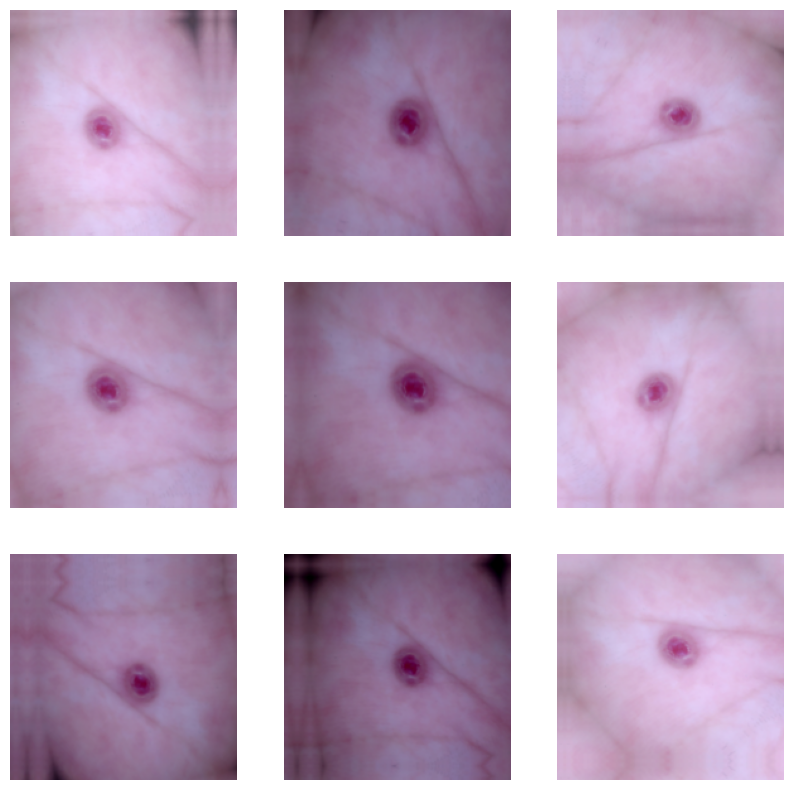

In [39]:
# Visualize the augmented images
plt.figure(figsize=(10, 10))

# Iterate over one batch of images from the training dataset
for batch_images, _ in train_ds.take(1):   
    # Display 9 augmented images
    for idx in range(9):
        # Apply the data augmentation to each image in the batch
        augmented_image = data_augmentation(batch_images)
        
        # Create a subplot for each image in a 3x3 grid
        ax = plt.subplot(3, 3, idx + 1)
        
        # Display the first augmented image from the batch
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        
        # Hide axis labels
        plt.axis("off")


#### Creating the Second model with augmented data

In [40]:

model2 = Sequential()  # Sequential model for layer-by-layer construction

# Data Augmentation Layer
# Applying random transformations to the input images to increase the diversity of the training data.
# Helps the model generalize better by exposing it to varied versions of the images.
model2.add(data_augmentation)

# Rescaling Layer
# Rescaling the input pixel values from [0, 255] to [0, 1] for improved model convergence.
model2.add(rescale)

# First Convolutional Layer
# Applying 32 filters with a 3x3 kernel size and ReLU activation to learn spatial patterns in the images.
# MaxPooling helps downsample the image, reducing dimensionality and retaining important features.
model2.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2, 2)))

# Dropout Layer (after Conv1)
# Randomly drops 25% of the units to prevent the model from overfitting during training.
model2.add(layers.Dropout(0.25))

# Second Convolutional Layer
# Applying 64 filters with a 3x3 kernel size to learn more complex patterns in the images.
# MaxPooling continues to reduce spatial dimensions while retaining key information.
model2.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2, 2)))

# Dropout Layer (after Conv2)
# Another 25% dropout applied to prevent overfitting and ensure the model generalizes well.
model2.add(layers.Dropout(0.25))

# Third Convolutional Layer
# Using 128 filters with a 3x3 kernel size to capture deeper and more abstract features from the image.
model2.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2, 2)))

# Flatten Layer
# Flattens the multi-dimensional tensor from the convolutional layers into a 1D vector
# to prepare it for the fully connected layers (dense layers).
model2.add(layers.Flatten())

# Dense Layer
# A fully connected layer with 512 units and ReLU activation to learn high-level representations of the features.
model2.add(layers.Dense(512, activation='relu'))

# Dense Layer
# A smaller fully connected layer with 128 units to further refine the learned features.
model2.add(layers.Dense(128, activation='relu'))

# Dropout Layer (after Dense)
# A 25% dropout rate in the dense layers to help prevent overfitting by dropping quarter of the units during training.
model2.add(layers.Dropout(0.25))

# Output Layer
# A softmax layer with the number of classes as units, to output class probabilities for multi-class classification.
# The softmax function ensures the output values are in the range [0, 1] and sum up to 1, representing probabilities.
model2.add(layers.Dense(len(class_names), activation='softmax'))


### Compiling the model

In [41]:

model2.compile(
                optimizer=Adam(learning_rate=0.001), 
                loss='categorical_crossentropy', 
                metrics=['accuracy']
                )


In [42]:
# Model summary representation
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 178, 178, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 89, 89, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 89, 89, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 87, 87, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 43, 43, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 43, 43, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 41, 41, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 20, 20, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (32, 51200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 512)              │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 128)              │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 9)                │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,374,985 (100.61 MB)

 Trainable params: 26,374,985 (100.61 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [43]:
# Fit the model
epochs = 20

history = model2.fit(train_ds, epochs=epochs, validation_data=val_ds, verbose=1)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 557ms/step - accuracy: 0.1689 - loss: 4.1206 - val_accuracy: 0.2192 - val_loss: 2.0934
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 604ms/step - accuracy: 0.1969 - loss: 2.0372 - val_accuracy: 0.2774 - val_loss: 1.9933
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 609ms/step - accuracy: 0.2928 - loss: 1.9206 - val_accuracy: 0.3937 - val_loss: 1.8091
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 590ms/step - accuracy: 0.3618 - loss: 1.7776 - val_accuracy: 0.3803 - val_loss: 1.7411
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 591ms/step - accuracy: 0.4025 - loss: 1.6478 - val_accuracy: 0.4698 - val_loss: 1.5966
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 600ms/step - accuracy: 0.4430 - loss: 1.5896 - val_accuracy: 0.4228 - val_loss: 1.7124
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 609ms/step - accuracy: 0.4350 - loss: 1.5455 - val_accuracy: 0.4676 - val_loss: 1.5389
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 592ms/step - accuracy: 0.4677 - loss: 1.5267 - val_accu

### Visualizing the results

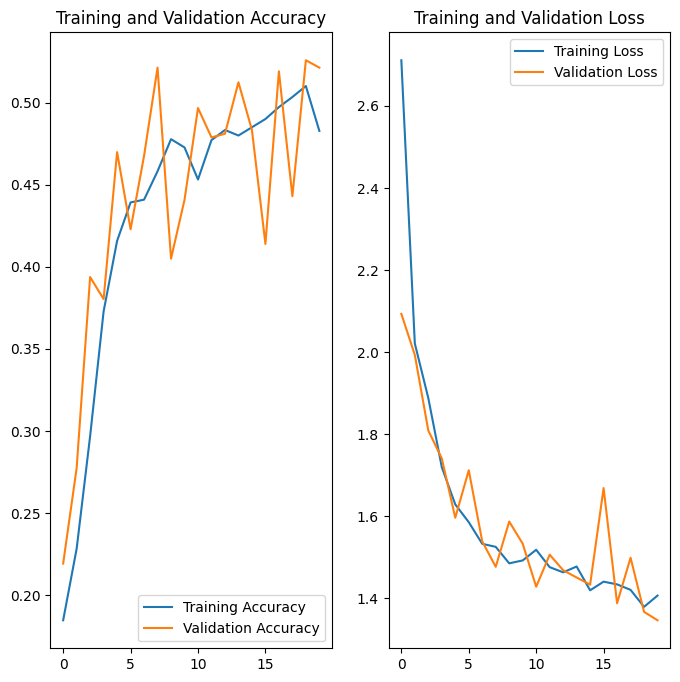

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
# Print training and validation loss and accuracy
print("Training Loss:", history.history['loss'])
print("Training Accuracy:", history.history['accuracy'])
print("Validation Loss:", history.history['val_loss'])
print("Validation Accuracy:", history.history['val_accuracy'])

Training Loss: [2.7112560272216797, 2.0211026668548584, 1.8881492614746094, 1.719911813735962, 1.6290613412857056, 1.5858947038650513, 1.5330618619918823, 1.5257327556610107, 1.4855507612228394, 1.4926477670669556, 1.518580436706543, 1.476287603378296, 1.463626503944397, 1.4778611660003662, 1.4198206663131714, 1.4408963918685913, 1.434308409690857, 1.4208943843841553, 1.3795298337936401, 1.406977891921997]
Training Accuracy: [0.1847098171710968, 0.2282366007566452, 0.296875, 0.3727678656578064, 0.4157366156578064, 0.4391741156578064, 0.4408482015132904, 0.4581473171710968, 0.4776785671710968, 0.47265625, 0.453125, 0.4771205484867096, 0.4832589328289032, 0.4799107015132904, 0.4849330484867096, 0.4899553656578064, 0.4972098171710968, 0.5033482313156128, 0.5100446343421936, 0.4827008843421936]
Validation Loss: [2.093370199203491, 1.993259310722351, 1.8091230392456055, 1.7411110401153564, 1.5965569019317627, 1.7123857736587524, 1.5389313697814941, 1.4770820140838623, 1.58735990524292, 1.53

#### Model evaluation
- **Training Performance**:
  - Training loss shows a consistent downward trend, indicating the model is learning and fitting to the training data.
  - Training accuracy gradually improves, starting at 18.5% and reaching 51%, suggesting slow but steady learning.

- **Validation Performance**:
  - Validation loss fluctuates but generally decreases over time, with a final value of 1.35, showing improvement.
  - Validation accuracy improves significantly, starting at 21.9% and ending at 52.1%, but shows inconsistency in some epochs.

- **Observations**:
  - The model's performance indicates a better fit to the training data compared to the validation data.
  - Validation accuracy improvement indicates the model is learning to generalize but may not have fully converged.
  - Model Performance is still not increased. Will check the distribution of classes in the training set to check is there have class imbalance.

### Class Distribution

In [46]:
def class_distribution_count(class_directories):
    # Get class names and their respective image counts
    class_dirs = [path for path in pathlib.Path(class_directories).iterdir() if path.is_dir()]
    count = [len([f for f in os.listdir(class_dir) if os.path.isfile(class_dir / f)]) for class_dir in class_dirs]
    class_names = [class_dir.name for class_dir in class_dirs]
    
    # Return dataframe with class names and image counts
    return pd.DataFrame({'Class': class_names, 'No. of Images': count})

In [47]:
class_distribution_df = class_distribution_count(data_dir_train)
class_distribution_df 

,Class,No. of Images
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


C:\Users\Saurav Suman\AppData\Local\Temp\ipykernel_16276\3516538330.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Saurav Suman\AppData\Local\Temp\ipykernel_16276\3516538330.py:11: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(


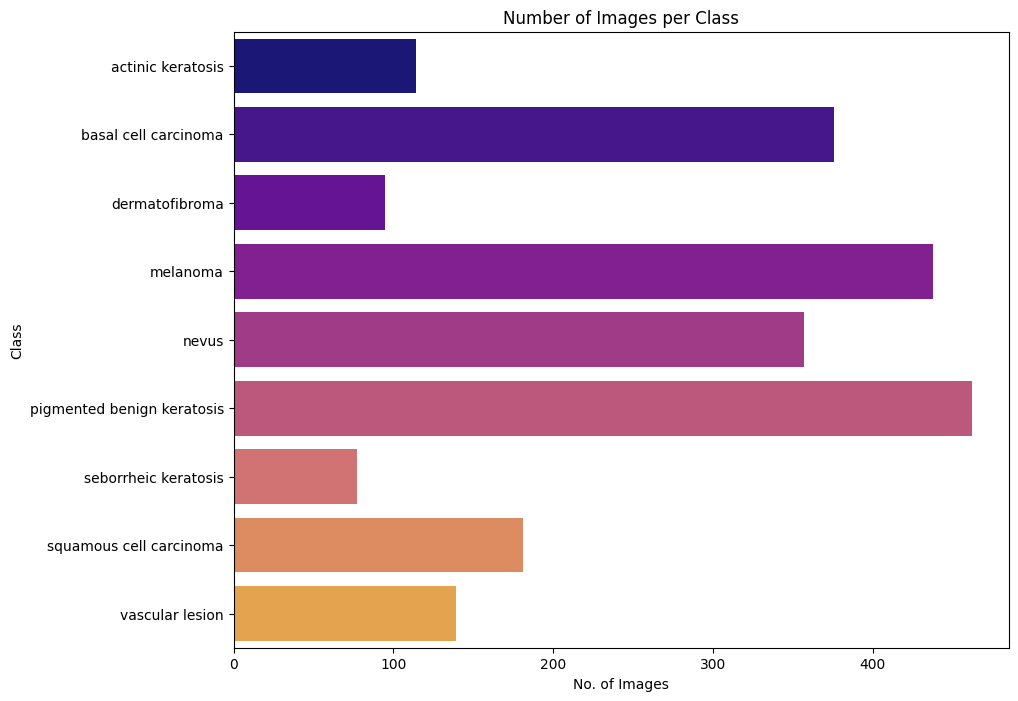

In [51]:
# Visualize the number of images in each class

plt.figure(figsize=(10, 8))
# Define the colormap
cmap = plt.cm.plasma 
num_colors = 10
colors = [cmap(i / num_colors) for i in range(num_colors)]
# Create a color palette based on the 'No. of Images' column, from high to low


sns.barplot(
            x="No. of Images",          # X-axis: number of images
            y="Class",                  # Y-axis: class names
            data=class_distribution_df, # Data from the dataframe
            palette=colors, 
            label="Class"               # Label for the legend
            )

plt.title("Number of Images per Class")
plt.show()

- The seborrheic keratosis class has the fewest samples, with only 77 instances.

- The classes pigmented benign keratosis (462 samples), melanoma (438 samples), basal cell carcinoma (376 samples), and nevus (357 samples) have the highest proportion of samples, dominating the dataset.


####  Handling class imbalances
As per the recommendation in the case study we can rectify class imbalances present in the training dataset with Augmentor library

### Using `Augmentor` for Image Augmentation

To use `Augmentor`, follow these general steps:

1. **Instantiate a `Pipeline` Object**: Create a `Pipeline` object and point it to the directory containing your initial image dataset.
2. **Define Operations**: Specify the operations to apply to your dataset using the `Pipeline` object.
3. **Execute Operations**: Call the `sample()` method on the `Pipeline` to execute the defined operations and apply them to the images.



In [54]:
# path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

for class_name in class_names:
    p = Augmentor.Pipeline(str(data_dir_train) + "/" + class_name)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) 

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2D0494BB8F0>: 100%|██████████| 500/500 [00:03<00:00, 136.76 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2D04946F470>: 100%|██████████| 500/500 [00:03<00:00, 150.11 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D048E789E0>: 100%|██████████| 500/500 [00:03<00:00, 143.78 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2D046A33680>: 100%|██████████| 500/500 [00:19<00:00, 26.27 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=2530x2122 at 0x2CFA4D27E90>: 100%|██████████| 500/500 [00:20<00:00, 24.75 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D048E3CE00>: 100%|██████████| 500/500 [00:04<00:00, 103.23 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2CFA4DC6A50>: 100%|██████████| 500/500 [00:11<00:00, 45.06 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2D048E3C6E0>: 100%|██████████| 500/500 [00:04<00:00, 103.93 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2CFEEC1A720>: 100%|██████████| 500/500 [00:05<00:00, 97.73 Samples/s]                   


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [55]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Check the distribution of augmented image count after adding new images to the original training data

In [56]:
# Get the file paths for .jpg images in the 'output' directory
image_paths = glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))

# Extract lesion names from the directory structure
lesion_labels = [os.path.basename(os.path.dirname(os.path.dirname(path))) for path in image_paths]

# Create a dictionary mapping image paths to lesion labels
image_lesion_dict = dict(zip(image_paths, lesion_labels))

# Create a DataFrame with image paths and corresponding lesion labels
image_lesion_df = pd.DataFrame(list(image_lesion_dict.items()), columns=['Path', 'Label'])

# Count the occurrences of each lesion label
lesion_counts = image_lesion_df['Label'].value_counts()

# Display the counts of each lesion label
lesion_counts

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to improve the class balance.

####  Train the model on the data created using Augmentor

####  Create training and validation dataset after Augementation

In [57]:
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train/" 

# Create a Traning dataset with 80:20 split
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,    #20% fraction of data to reserve for validation.
  subset = "training",
  image_size=(IMG_HEIGHT, IMG_WIDTH),label_mode='categorical', 
  batch_size=BATCH_SIZE)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [58]:
# Create a Validation dataset with 80:20 split
val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(IMG_HEIGHT, IMG_WIDTH),label_mode='categorical',  
  batch_size=BATCH_SIZE)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create model 

In [59]:
# Model definition
model3 = Sequential()

# Rescaling Layer: Rescale pixel values to the range [0, 1] to normalize the input data.
model3.add(rescale)

# First Convolutional Layer:
# Apply 32 filters with a 2x2 kernel to capture basic features, followed by MaxPooling to reduce spatial dimensions.
# Dropout is added to reduce overfitting.
model3.add(layers.Conv2D(32, kernel_size=(2, 2), activation='relu'))
model3.add(layers.BatchNormalization())  # Batch normalization after convolution layer
model3.add(layers.MaxPool2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))

# Second Convolutional Layer:
# Apply 64 filters with a 2x2 kernel to capture more complex features, followed by MaxPooling.
# Dropout to prevent overfitting.
model3.add(layers.Conv2D(64, kernel_size=(2, 2), activation='relu'))
model3.add(layers.BatchNormalization())  # Batch normalization after convolution layer
model3.add(layers.MaxPool2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))

# Third Convolutional Layer:
# Apply 128 filters with a 2x2 kernel to capture deeper features.
model3.add(layers.Conv2D(128, kernel_size=(2, 2), activation='relu'))
model3.add(layers.BatchNormalization())  # Batch normalization after convolution layer
model3.add(layers.MaxPool2D(pool_size=(2, 2)))

# Flatten Layer: Flattens the output of the convolutional layers to a 1D vector for input to fully connected layers.
model3.add(layers.Flatten())

# Fully Connected Dense Layer:
# A dense layer with 512 units and ReLU activation to learn high-level features from the image data.
model3.add(layers.Dense(512, activation='relu'))

# Dropout Layer: Drop 25% of the input units to prevent overfitting during training.
model3.add(layers.Dropout(0.25))

# Batch Normalization Layer:
# Normalizes the inputs to the layer by re-centering and re-scaling, helping the model train faster and improving stability.
model3.add(layers.BatchNormalization())

# Fully Connected Dense Layer:
# A smaller dense layer with 128 units to learn more refined features from the data.
model3.add(layers.Dense(128, activation='relu'))

# Dropout Layer: Drop 25% of the input units to prevent overfitting during training.
model3.add(layers.Dropout(0.25))

# Batch Normalization Layer:
# Another batch normalization to stabilize training and improve convergence.
model3.add(layers.BatchNormalization())

# Output Layer:
# Softmax activation to output class probabilities, for multi-class classification.
model3.add(layers.Dense(len(class_names), activation='softmax'))


#### Compile Model

In [60]:

model3.compile(
                optimizer=Adam(learning_rate=0.001), 
                loss='categorical_crossentropy', 
                metrics=['accuracy']
                )


In [61]:
# Model Summary
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 179, 179, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (32, 179, 179, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 89, 89, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (32, 89, 89, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 88, 88, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (32, 88, 88, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 44, 44, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (32, 44, 44, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 43, 43, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (32, 43, 43, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 21, 21, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (32, 56448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 512)              │    28,901,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (32, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (32, 512)              │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (32, 128)              │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (32, 128)              │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (32, 9)                │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,013,737 (110.68 MB)

 Trainable params: 29,012,009 (110.67 MB)

 Non-trainable params: 1,728 (6.75 KB)

####  Train your model

In [62]:
epochs = 30 # Updated epochs as per the case study requirement
history = model3.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[early_stop], verbose=1)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 170s 974ms/step - accuracy: 0.3278 - loss: 1.9772 - val_accuracy: 0.1084 - val_loss: 4.1676
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 151s 894ms/step - accuracy: 0.4873 - loss: 1.4087 - val_accuracy: 0.1314 - val_loss: 3.6910
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.5703 - loss: 1.1922 - val_accuracy: 0.2272 - val_loss: 2.4985
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.6035 - loss: 1.0731 - val_accuracy: 0.3311 - val_loss: 2.2153
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.6465 - loss: 0.9589 - val_accuracy: 0.2970 - val_loss: 2.4814
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.6786 - loss: 0.8679 - val_accuracy: 0.3170 - val_loss: 2.7120
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.7191 - loss: 0.7712 - val_accuracy: 0.5598 - val_loss: 1.2321
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.7463 - loss: 0.6772 - va

In [63]:
print(f'Training stopped early at epoch:{check_early_stop_epoch()}')

Training stopped early at epoch:24


####  Visualize the model results

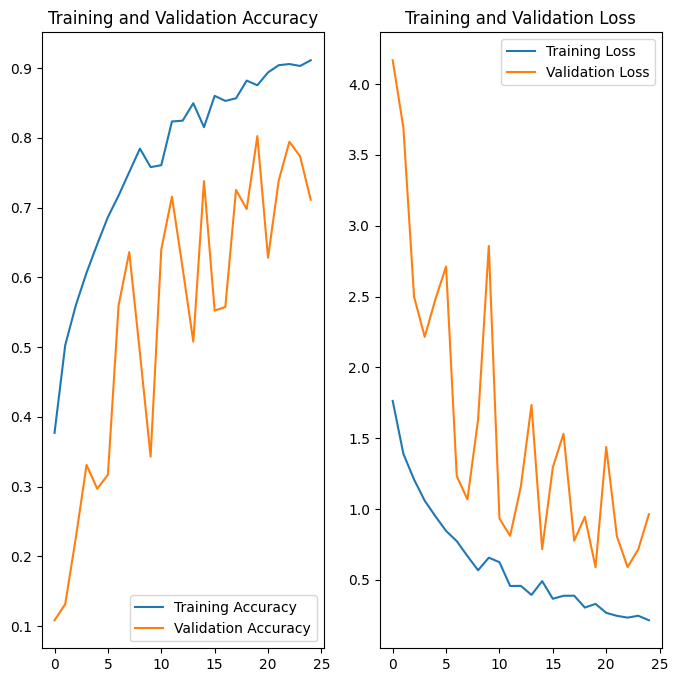

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(early_stop.stopped_epoch+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [87]:
# Print accuracy and validation accuracy
print(f"Training Accuracy: {acc[-1]:.2f}")
print(f"Validation Accuracy: {val_acc[-1]:.2f}")

# Print loss and validation loss
print(f"Training Loss: {loss[-1]:.2f}")
print(f"Validation Loss: {val_loss[-1]:.2f}")

Training Accuracy: 0.91
Validation Accuracy: 0.71
Training Loss: 0.21
Validation Loss: 0.96


### ############TODO Update this as per the above  results

 -  As per the final model (model3) Training accuracy and validation accuracy increases.
 -  Model overfitting issue is solved.
 -  Class rebalance helps in augmentation and achieving the best Training and validation accuracy.

## Model Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Actual Class:		basal cell carcinoma
Model Predicted Class:  basal cell carcinoma


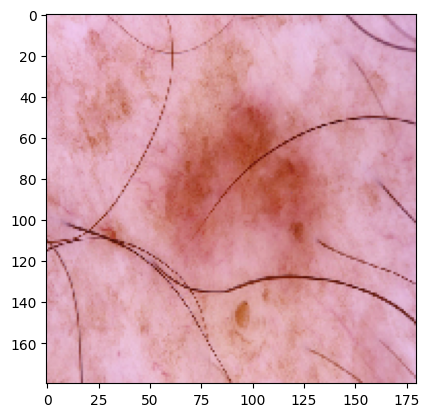

In [118]:

Test_image_path = os.path.join(data_dir_test, class_names[re.randint(0, 8)], '*')
Test_image = glob(Test_image_path)

Test_image = load_img(Test_image[re.randint(0, len(Test_image)-1)],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model3.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class:\t\t" + class_names[1] + '\n' + "Model Predicted Class: " + " " + pred_class )

In [107]:
############################################################################3

In [1]:

model4 = Sequential()

# # Data Augmentation
# model4.add(data_augmentation)

# Rescaling Layer
model4.add(rescale)

# First Convolutional Layer
model4.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPool2D(pool_size=(2, 2)))
model4.add(layers.Dropout(0.3))

# Second Convolutional Layer
model4.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPool2D(pool_size=(2, 2)))
model4.add(layers.Dropout(0.4))

# Third Convolutional Layer
model4.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPool2D(pool_size=(2, 2)))
model4.add(layers.Dropout(0.4))

# Fourth Convolutional Layer
model4.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPool2D(pool_size=(2, 2)))
model4.add(layers.Dropout(0.5))

# Flatten Layer
model4.add(layers.Flatten())

# Dense Layers
model4.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model4.add(layers.Dropout(0.5))
model4.add(layers.BatchNormalization())

model4.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model4.add(layers.Dropout(0.5))
model4.add(layers.BatchNormalization())

# Output Layer
model4.add(layers.Dense(len(class_names), activation='softmax'))



NameError: name 'Sequential' is not defined

In [120]:

# Compile
model4.compile(optimizer=Adam(learning_rate=0.001), 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [121]:
model4.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (32, 178, 178, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (32, 178, 178, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 89, 89, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (32, 89, 89, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (32, 87, 87, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (32, 87, 87, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (32, 43, 43, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (32, 43, 43, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (32, 41, 41, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (32, 41, 41, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (32, 20, 20, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (32, 20, 20, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (32, 18, 18, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (32, 18, 18, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (32, 9, 9, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (32, 9, 9, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (32, 20736)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (32, 512)              │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (32, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (32, 512)              │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 11,077,065 (42.26 MB)

 Trainable params: 11,074,825 (42.25 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [122]:
# Training the model
history = model4.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=epochs,  # Maximum number of epochs
    batch_size=BATCH_SIZE,  # Batch size
    callbacks= [early_stop],  # Apply callbacks
    verbose=1  # Print training progress
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.2208 - loss: 15.7952 - val_accuracy: 0.1403 - val_loss: 8.5228
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.3015 - loss: 7.1143 - val_accuracy: 0.1403 - val_loss: 6.0343
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.3073 - loss: 4.8483 - val_accuracy: 0.1514 - val_loss: 4.4500
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.3355 - loss: 3.7875 - val_accuracy: 0.2962 - val_loss: 3.5230
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.3352 - loss: 3.3212 - val_accuracy: 0.2227 - val_loss: 3.3718
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.3482 - loss: 2.9722 - val_accuracy: 0.3786 - val_loss: 2.8485
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.3545 - loss: 2.8145 - val_accuracy: 0.3237 - val_loss: 2.8869
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.3549 - loss: 2.7929 - val_acc

In [105]:
check_early_stop_epoch()

19